In [1]:
import rpy2
import rpy2.robjects.lib.ggplot2 as ggplot2
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
base = importr('base')

# the base of rpy2 plotting is matplotlib, thus we need to declare
# it inline in order to see the plots in the notebook
%matplotlib inline

# we need to activate the automatic conversion for pandas
from rpy2.robjects import pandas2ri
pandas2ri.activate()

# load the needed extension for the %%R cell magic
%load_ext rpy2.ipython

import numpy as np
import pandas as pd

%config IPCompleter.greedy=True

import matplotlib.pylab as plt
plt.rcParams['figure.dpi'] = 200

In [2]:
rootdir = "/home/akshay/research/burrito"
outdirs = [ "tput-698d752"]
datapaths = ['kernel', 'kernel_nobertha','dpdkinline', 'dpdkinline_nobertha']
num_clients = [1,2,4,8,16,32,64]
file_sizes = [50000000]

In [3]:
# note: this aggregates requestclients together

'''
def read_kv_csv(fn):
    with open(fn, 'r') as f:
        records = []
        for line in f:
            rec = {}
            for fld in line.split(','):
                col, val = fld.split('=')
                if '.' not in val:
                    rec[col] = int(val)
                else:
                    rec[col] = float(val)
            records.append(rec)
        return records
'''

def read_exp(outdir, dp, nc, fs):
    df = pd.DataFrame()
    for i in range(10):
        fn = f"{rootdir}/{outdir}/{dp}-num_clients={nc}-file_size={fs}-{i}-tbench_client-10.10.1.1.data"
        try:
            df_iter = pd.read_csv(fn)
            #df_iter["iter"] = i
            df_iter["Commit"] = outdir
            df_iter["Datapath"] = dp
            del df_iter["download_size"]
            del df_iter["elapsed_us"]
            del df_iter['tot_bytes']
            df = df.append(df_iter)
        except Exception as e:
            #print(e)
            pass
    return df

exps = None
for outdir in outdirs:
    for dp in datapaths:
        for nc in num_clients:
            for fs in file_sizes:
                df = read_exp(outdir, dp, nc, fs)
                if exps is None:
                    exps = df
                else:
                    exps = exps.append(df)

exps = exps.groupby(["Commit", "Datapath", "num_clients"]).quantile([0.25, 0.5, 0.75])
exps = exps.unstack()
exps.columns = [f"{s}_{t}" for s,t in exps.columns.values]
exps.columns = exps.columns.to_flat_index()
exps = exps.reset_index()
exps

,Commit,Datapath,num_clients,rate_bps_0.25,rate_bps_0.5,rate_bps_0.75
0,tput-698d752,dpdkinline,1,9.546698e+09,9.547155e+09,9.547339e+09
1,tput-698d752,dpdkinline,2,1.079082e+10,1.079362e+10,1.079610e+10
2,tput-698d752,dpdkinline,4,1.108583e+10,1.108802e+10,1.108909e+10
3,tput-698d752,dpdkinline,8,1.126980e+10,1.127047e+10,1.127084e+10
4,tput-698d752,dpdkinline,16,1.913534e+10,1.913546e+10,1.913560e+10
5,tput-698d752,dpdkinline,32,1.035245e+10,1.035269e+10,1.035312e+10
6,tput-698d752,dpdkinline,64,9.800560e+09,9.800821e+09,9.800968e+09
7,tput-698d752,dpdkinline_nobertha,1,9.404243e+09,9.404763e+09,9.405188e+09
8,tput-698d752,dpdkinline_nobertha,2,1.069940e+10,1.070239e+10,1.070500e+10
9,tput-698d752,dpdkinline_nobertha,4,1.106876e+10,1.106968e+10,1.107145e+10


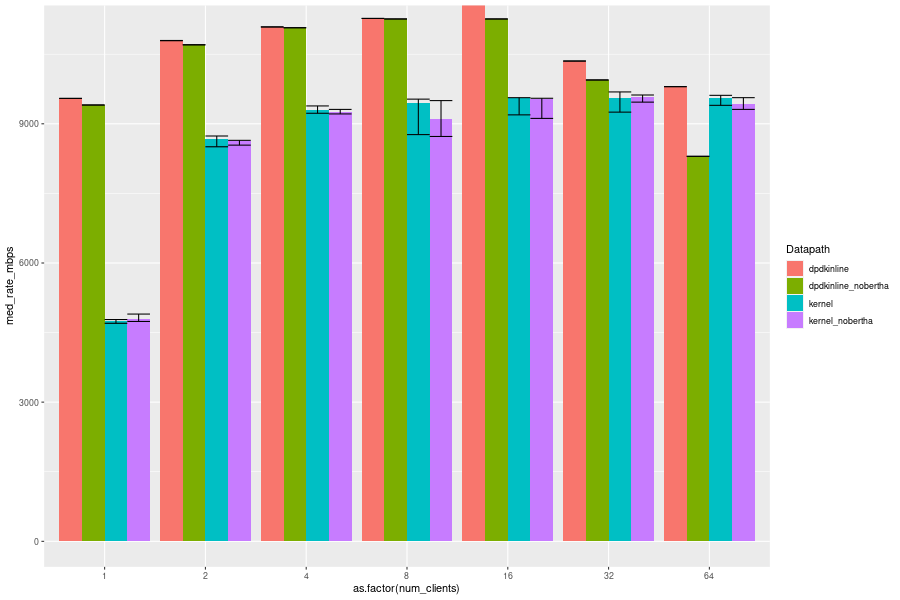

In [4]:
%%R -i exps -w 900 -h 600

library(ggplot2)

exps$med_rate_mbps <- exps$rate_bps_0.5 / 1e6
exps$low_rate_mbps <- exps$rate_bps_0.25 / 1e6
exps$hih_rate_mbps <- exps$rate_bps_0.75 / 1e6
ggplot(exps, aes(x=as.factor(num_clients), y=med_rate_mbps, fill=Datapath)) +
  geom_col(position="dodge") +
  geom_errorbar(aes(ymin=low_rate_mbps, ymax=hih_rate_mbps), position="dodge") +
  coord_cartesian(ylim=c(0,11e3))

In [5]:
exps.to_csv("./throughput-698d752.csv")